# 1. Install necessary libraries

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 18.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/OULAD_analysis/'

# 2. Load the OULAD dataset

In [ ]:
assess = pd.read_csv(path + 'assessments.csv')
course = pd.read_csv(path + 'courses.csv')
stdAssess = pd.read_csv(path + 'studentAssessment.csv')
stdInfo = pd.read_csv(path + 'studentInfo.csv')
stdReg = pd.read_csv(path + 'studentRegistration.csv')
stdVle = pd.read_csv(path + 'studentVle.csv')
vle = pd.read_csv(path + 'vle.csv')

# 3. Data Preprocessing & Preparation

In [ ]:
stdInfo['final_result'] = np.where(stdInfo['final_result'] == 'Withdrawn', 1, 0)

In [ ]:
stdInfo.groupby('region')[['final_result']].mean()

,final_result
region,
East Anglian Region,0.301198
East Midlands Region,0.347569
Ireland,0.230574
London Region,0.345149
North Region,0.315414
North Western Region,0.355816
Scotland,0.263204
South East Region,0.307437
South Region,0.300129


In [ ]:
region = stdInfo.groupby('region')[['final_result']].mean()
stdInfo = pd.merge(stdInfo, region, how='left', on='region')
stdInfo = stdInfo.drop('region', axis=1)
stdInfo = stdInfo.rename(columns={'final_result_x': 'final_result', 'final_result_y': 'region'})
stdInfo

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region
0,AAA,2013J,11391,M,HE Qualification,90-100%,55<=,0,240,N,0,0.301198
1,AAA,2013J,28400,F,HE Qualification,20-30%,35-55,0,60,N,0,0.263204
2,AAA,2013J,30268,F,A Level or Equivalent,30-40%,35-55,0,60,Y,1,0.355816
3,AAA,2013J,31604,F,A Level or Equivalent,50-60%,35-55,0,60,N,0,0.307437
4,AAA,2013J,32885,F,Lower Than A Level,50-60%,0-35,0,60,N,0,0.353602
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Lower Than A Level,10-20,0-35,0,30,N,0,0.251198
32589,GGG,2014J,2645731,F,Lower Than A Level,40-50%,35-55,0,30,N,0,0.301198
32590,GGG,2014J,2648187,F,A Level or Equivalent,20-30%,0-35,0,30,Y,0,0.300129
32591,GGG,2014J,2679821,F,Lower Than A Level,90-100%,35-55,0,30,N,1,0.307437


In [ ]:
stdVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
stdVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

## Merge dataset (StudentInfo, StudentVle)
Didn't consider activity type to simplise the dataset

In [ ]:
stdInfo_stdVle = pd.merge(stdInfo, stdVle, how='left', on=['id_student','code_module','code_presentation']).sort_values(['id_student','code_module','code_presentation'])

In [ ]:
stdInfo_stdVle

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region,id_site,date,sum_click
3664366,DDD,2013J,3733,M,HE Qualification,90-100%,55<=,0,60,N,1,0.300129,NaN,NaN,NaN
180987,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877049.0,-23.0,1.0
180988,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877053.0,-23.0,16.0
180989,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877044.0,-23.0,1.0
180990,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877079.0,-23.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271303,FFF,2014J,2702660,F,Lower Than A Level,50-60%,0-35,0,240,N,1,0.345149,NaN,NaN,NaN
3664364,DDD,2013B,2707979,F,Lower Than A Level,60-70%,0-35,0,120,N,0,0.347569,NaN,NaN,NaN
3664365,DDD,2013B,2710343,M,Lower Than A Level,0-10%,0-35,0,60,N,0,0.355816,NaN,NaN,NaN
4725395,DDD,2014B,2710343,M,Lower Than A Level,0-10%,0-35,1,60,N,0,0.355816,NaN,NaN,NaN


In [ ]:
stdInfo_stdVle['id_student'].nunique()

28785

In [ ]:
stdInfo_stdVle['date'].isna().sum()

3365

In [ ]:
stdInfo_stdVle['date'].notnull().sum()

10655280

In [ ]:
stdInfo_stdVle.isna().sum()

code_module                  0
code_presentation            0
id_student                   0
gender                       0
highest_education            0
imd_band                601942
age_band                     0
num_of_prev_attempts         0
studied_credits              0
disability                   0
final_result                 0
region                       0
id_site                   3365
date                      3365
sum_click                 3365
dtype: int64

In [ ]:
stdInfo_stdVle = stdInfo_stdVle.dropna()
stdInfo_stdVle = stdInfo_stdVle.sort_values('id_student')

In [ ]:
stdInfo_stdVle.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region,id_site,date,sum_click
181008,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877030.0,-20.0,12.0
181009,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877222.0,-20.0,2.0
181010,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877045.0,-20.0,4.0
181011,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877221.0,-20.0,2.0
181012,AAA,2014J,6516,M,HE Qualification,80-90%,55<=,0,60,N,0,0.263204,877135.0,-17.0,1.0


In [ ]:
stdInfo_stdVle['id_student'].nunique()

25149

In [ ]:
stdInfo_stdVle[stdInfo_stdVle['code_module']=='BBB']['id_student'].nunique()

6431

In [ ]:
pivot_df = stdInfo_stdVle.pivot_table(
    index=['id_student','code_module','code_presentation','final_result','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability'],
    columns='date',
    values='sum_click',
    aggfunc='sum'
).reset_index()

In [ ]:
pivot_df.fillna(inplace=True, value=0)

In [ ]:
pivot_df

date,id_student,code_module,code_presentation,final_result,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,6516,AAA,2014J,0,M,0.263204,HE Qualification,80-90%,55<=,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8462,DDD,2013J,1,M,0.345149,HE Qualification,30-40%,55<=,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8462,DDD,2014J,1,M,0.345149,HE Qualification,30-40%,55<=,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11391,AAA,2013J,0,M,0.301198,HE Qualification,90-100%,55<=,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23629,BBB,2013B,0,F,0.301198,Lower Than A Level,20-30%,0-35,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,M,0.347569,Lower Than A Level,60-70%,0-35,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28170,2698535,CCC,2014B,1,M,0.251198,Lower Than A Level,50-60%,0-35,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28171,2698535,EEE,2013J,0,M,0.251198,Lower Than A Level,50-60%,0-35,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28172,2698577,BBB,2014J,0,F,0.251198,Lower Than A Level,50-60%,35-55,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Data Modeling (TSF + RF = Meta-model)

## 4.1) Time Series data (Interactive data) - Time Series Forest model (TSF)

### Prepare the dataset

In [ ]:
ts_pivot_df = pivot_df.drop(['id_student','code_module','code_presentation','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability'], axis=1)

In [ ]:
ts_pivot_df

date,final_result,-25.0,-24.0,-23.0,-22.0,-21.0,-20.0,-19.0,-18.0,-17.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,0,0.0,0.0,28.0,82.0,0.0,41.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28170,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28171,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28172,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ts_pivot_df['final_result'].value_counts()

final_result
0    21189
1     6985
Name: count, dtype: int64

In [ ]:
ts_pivot_df.dtypes

date
final_result      int64
-25.0           float64
-24.0           float64
-23.0           float64
-22.0           float64
                 ...   
265.0           float64
266.0           float64
267.0           float64
268.0           float64
269.0           float64
Length: 296, dtype: object

### Modeling

In [ ]:
import pandas as pd
import numpy as np
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Identify time series columns (assuming they are all the columns with float type which represents days)
time_series_columns = ts_pivot_df.columns[ts_pivot_df.dtypes == 'float64']

# Reshape the DataFrame for sktime: transform each row's time series data into a 2D numpy array
X = np.array(ts_pivot_df[time_series_columns].apply(lambda row: row.values.reshape(1, -1), axis=1).tolist())

y = ts_pivot_df['final_result'].values  # target variable

In [ ]:
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train_ts.shape

(21130, 1, 295)

In [ ]:
X_test_ts.shape

(7044, 1, 295)

In [ ]:
# Initialize the Time Series Forest classifier
ts_model = TimeSeriesForestClassifier(n_estimators=100, n_jobs=-1)

# Fit the model
ts_model.fit(X_train_ts, y_train_ts)

# Predict on the test set
tsf_predictions = ts_model.predict(X_test_ts)

# Evaluate the model
accuracy = accuracy_score(y_test_ts, tsf_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.36%


In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_ts, tsf_predictions, target_names=target_names))

Accuracy: 85.36%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5333
           1       0.67      0.77      0.72      1711

    accuracy                           0.85      7044
   macro avg       0.80      0.82      0.81      7044
weighted avg       0.86      0.85      0.86      7044



## 4.2) Categorical data (Student Demographic data) - Random Forest model

### Prepare the dataset

In [ ]:
cat_df = pivot_df[['id_student','code_module','code_presentation','final_result','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability']]

In [ ]:
cat_df

date,id_student,code_module,code_presentation,final_result,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,6516,AAA,2014J,0,M,0.263204,HE Qualification,80-90%,55<=,0,60,N
1,8462,DDD,2013J,1,M,0.345149,HE Qualification,30-40%,55<=,0,90,N
2,8462,DDD,2014J,1,M,0.345149,HE Qualification,30-40%,55<=,1,60,N
3,11391,AAA,2013J,0,M,0.301198,HE Qualification,90-100%,55<=,0,240,N
4,23629,BBB,2013B,0,F,0.301198,Lower Than A Level,20-30%,0-35,2,60,N
...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,M,0.347569,Lower Than A Level,60-70%,0-35,0,120,N
28170,2698535,CCC,2014B,1,M,0.251198,Lower Than A Level,50-60%,0-35,0,60,N
28171,2698535,EEE,2013J,0,M,0.251198,Lower Than A Level,50-60%,0-35,0,60,N
28172,2698577,BBB,2014J,0,F,0.251198,Lower Than A Level,50-60%,35-55,0,60,N


In [ ]:
cat_df['id_student'].nunique()

25149

In [ ]:
cat_df.drop_duplicates(inplace=True)

<ipython-input-37-03482e14796c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop_duplicates(inplace=True)


In [ ]:
cat_df

date,id_student,code_module,code_presentation,final_result,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,6516,AAA,2014J,0,M,0.263204,HE Qualification,80-90%,55<=,0,60,N
1,8462,DDD,2013J,1,M,0.345149,HE Qualification,30-40%,55<=,0,90,N
2,8462,DDD,2014J,1,M,0.345149,HE Qualification,30-40%,55<=,1,60,N
3,11391,AAA,2013J,0,M,0.301198,HE Qualification,90-100%,55<=,0,240,N
4,23629,BBB,2013B,0,F,0.301198,Lower Than A Level,20-30%,0-35,2,60,N
...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,M,0.347569,Lower Than A Level,60-70%,0-35,0,120,N
28170,2698535,CCC,2014B,1,M,0.251198,Lower Than A Level,50-60%,0-35,0,60,N
28171,2698535,EEE,2013J,0,M,0.251198,Lower Than A Level,50-60%,0-35,0,60,N
28172,2698577,BBB,2014J,0,F,0.251198,Lower Than A Level,50-60%,35-55,0,60,N


In [ ]:
cat_df.isna().sum()

date
id_student              0
code_module             0
code_presentation       0
final_result            0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
dtype: int64

In [ ]:
cat_df_dummy = pd.get_dummies(cat_df, columns=['gender','highest_education','imd_band','age_band','disability'])

In [ ]:
cat_df_dummy

,id_student,code_module,code_presentation,final_result,region,num_of_prev_attempts,studied_credits,gender_F,gender_M,highest_education_A Level or Equivalent,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,6516,AAA,2014J,0,0.263204,0,60,False,True,False,...,False,False,False,True,False,False,False,True,True,False
1,8462,DDD,2013J,1,0.345149,0,90,False,True,False,...,False,False,False,False,False,False,False,True,True,False
2,8462,DDD,2014J,1,0.345149,1,60,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,11391,AAA,2013J,0,0.301198,0,240,False,True,False,...,False,False,False,False,True,False,False,True,True,False
4,23629,BBB,2013B,0,0.301198,2,60,True,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,0.347569,0,120,False,True,False,...,False,True,False,False,False,True,False,False,True,False
28170,2698535,CCC,2014B,1,0.251198,0,60,False,True,False,...,True,False,False,False,False,True,False,False,True,False
28171,2698535,EEE,2013J,0,0.251198,0,60,False,True,False,...,True,False,False,False,False,True,False,False,True,False
28172,2698577,BBB,2014J,0,0.251198,0,60,True,False,False,...,True,False,False,False,False,False,True,False,True,False


In [ ]:
cat_df_dummy.columns

Index(['id_student', 'code_module', 'code_presentation', 'final_result',
       'region', 'num_of_prev_attempts', 'studied_credits', 'gender_F',
       'gender_M', 'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20', 'imd_band_20-30%', 'imd_band_30-40%',
       'imd_band_40-50%', 'imd_band_50-60%', 'imd_band_60-70%',
       'imd_band_70-80%', 'imd_band_80-90%', 'imd_band_90-100%',
       'age_band_0-35', 'age_band_35-55', 'age_band_55<=', 'disability_N',
       'disability_Y'],
      dtype='object')

### Feature Selection - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'final_result' is your target and the rest are features
X = cat_df_dummy.drop(['final_result', 'code_module', 'code_presentation', 'id_student'], axis=1)  # dropping the unique key columns and target
y = cat_df_dummy['final_result']

# Splitting the dataset into training and testing sets
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_fs, y_train_fs)

# Get feature importances
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train_fs.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the DataFrame containing feature importances
print(feature_importances)

                                               importance
region                                           0.413444
studied_credits                                  0.210580
num_of_prev_attempts                             0.086614
age_band_0-35                                    0.018400
age_band_35-55                                   0.018163
imd_band_10-20                                   0.018120
imd_band_40-50%                                  0.017926
imd_band_30-40%                                  0.017532
imd_band_50-60%                                  0.017233
imd_band_60-70%                                  0.016934
imd_band_20-30%                                  0.016265
imd_band_0-10%                                   0.016263
imd_band_80-90%                                  0.014662
imd_band_70-80%                                  0.014624
highest_education_Lower Than A Level             0.014107
gender_F                                         0.013626
highest_educat

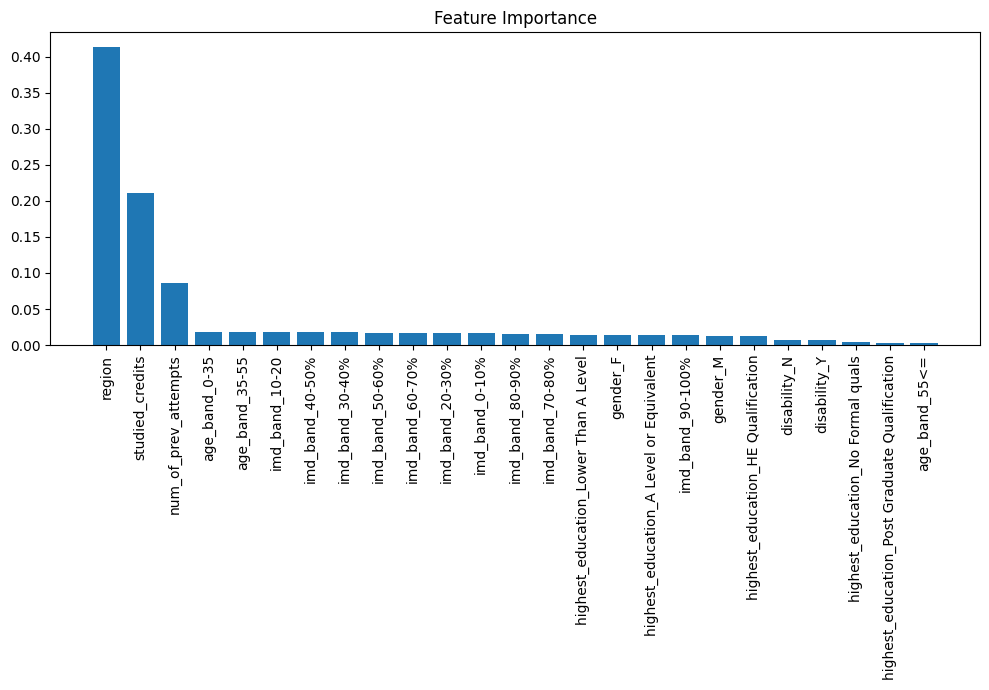

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title('Feature Importance')
plt.bar(range(X_train_fs.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_fs.shape[1]), X_train_fs.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
cat_selected_df = cat_df_dummy[['id_student','code_module','code_presentation','region','studied_credits','num_of_prev_attempts','gender_F','gender_M','final_result']]

In [ ]:
cat_selected_df = cat_selected_df.groupby(['id_student','code_module','code_presentation'])[['region','studied_credits','num_of_prev_attempts','gender_F','gender_M','final_result']].first()

In [ ]:
cat_selected_df

region  studied_credits  \
id_student code_module code_presentation                              
6516       AAA         2014J              0.263204               60   
8462       DDD         2013J              0.345149               90   
                       2014J              0.345149               60   
11391      AAA         2013J              0.301198              240   
23629      BBB         2013B              0.301198               60   
...                                            ...              ...   
2698257    AAA         2013J              0.347569              120   
2698535    CCC         2014B              0.251198               60   
           EEE         2013J              0.251198               60   
2698577    BBB         2014J              0.251198               60   
2698588    BBB         2014J              0.327517              120   

                                          num_of_prev_attempts  gender_F  \
id_student code_module code_presentation                                   
6516       AAA         2014J                                 0     False   
8462       DDD         2013J                                 0     False   
                       2014J                                 1     False   
11391      AAA         2013J                                 0     False   
23629      BBB         2013B                                 2      True   
...                                                        ...       ...   
2698257    AAA         2013J                                 0     False   
2698535    CCC         2014B                                 0     False   
           EEE         2013J                                 0     False   
2698577    BBB         2014J                                 0      True   
2698588    BBB         2014J                                 0      True   

                                          gender_M  final_result  
id_student code_module code_presentation                          
6516       AAA         2014J                  True             0  
8462       DDD         2013J                  True             1  
                       2014J                  True             1  
11391      AAA         2013J                  True             0  
23629      BBB         2013B                 False             0  
...                                            ...           ...  
2698257    AAA         2013J                  True             0  
2698535    CCC         2014B                  True             1  
           EEE         2013J                  True             0  
2698577    BBB         2014J                 False             0  
2698588    BBB         2014J                 False             0  

[28174 rows x 6 columns]

In [ ]:
cat_selected_df['final_result'].value_counts()

final_result
0    21189
1     6985
Name: count, dtype: int64

### Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame
X = cat_selected_df.drop(['final_result'], axis=1)  # Exclude the target variable
y = cat_selected_df['final_result']  # Target variable

# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict on the test set
rf_predictions = rf_model.predict(X_test_rf)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_rf, rf_predictions) * 100:.2f}%")
print(classification_report(y_test_rf, rf_predictions))

Accuracy: 75.37%
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5333
           1       0.44      0.05      0.09      1711

    accuracy                           0.75      7044
   macro avg       0.60      0.51      0.47      7044
weighted avg       0.68      0.75      0.67      7044



## 4.3) Meta-model combining two previous models

### Modeling

In [ ]:
from scipy.stats import mode

# Simple majority vote
final_predictions = mode(np.column_stack((tsf_predictions, rf_predictions)), axis=1)[0]

In [ ]:
# Assuming the predictions are probabilities or continuous scores
ts_probs = ts_model.predict_proba(X_test_ts)[:, 1]  # Get probability of class 1
rf_probs = rf_model.predict_proba(X_test_rf)[:, 1]

In [ ]:
meta_features = np.column_stack((ts_probs, rf_probs))

In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_test_ts)

LogisticRegression()

In [ ]:
meta_predictions = meta_model.predict(meta_features)

### Meta-Model Outcome

In [ ]:
accuracy = accuracy_score(y_test_ts, meta_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_ts, meta_predictions))

Accuracy: 85.01%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5333
           1       0.69      0.69      0.69      1711

    accuracy                           0.85      7044
   macro avg       0.80      0.80      0.80      7044
weighted avg       0.85      0.85      0.85      7044



In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_ts, meta_predictions)
cnf_matrix

array([[4811,  522],
       [ 534, 1177]])

Text(0.5, 427.9555555555555, 'Predicted label')

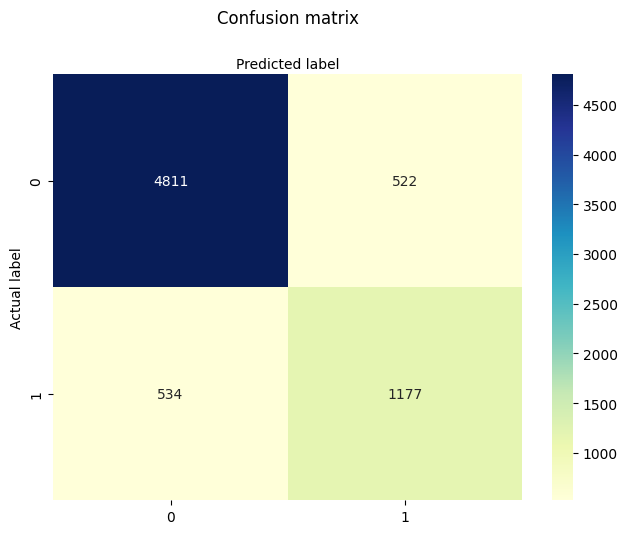

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

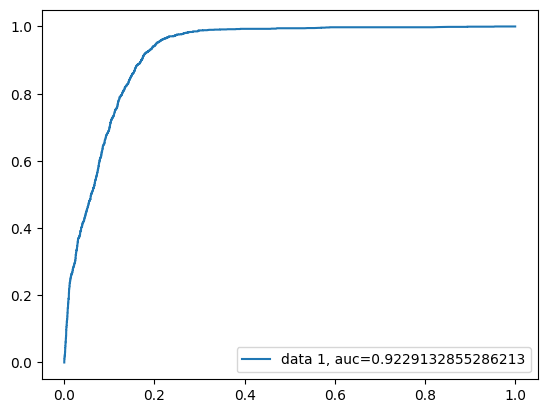

In [ ]:
y_pred_proba = meta_model.predict_proba(meta_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_ts, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ts, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()